# 40-modeling-sklearn
> Modeling using scikit-learn

In this notebook, we train models using the pipeline functionality from scikit-learn.

In [1]:
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
#tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
import os


In [3]:
os.chdir('/data/p_dsi/teams2023/team9/')
os.getcwd()

'/gpfs52/data/p_dsi/teams2023/team9'

# Load the data

# Split the data

converting data types into integer and encoding all categorical variables;
Converting original dataset into model-based dataset

In [7]:
data_filename = 'final_input_data.csv'
df_apple = pd.read_csv(data_filename)
df_apple['week_of_monday'] = pd.to_datetime(df_apple[['year', 'month', 'day']])
df_apple = df_apple.set_index('week_of_monday')
df_apple.index = pd.to_datetime(df_apple.index)
display(df_apple.head())
df_apple.info()


,phone size,claim,year,black,blue,coral,gold,graphite,gray,green,...,Q4,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day
week_of_monday,,,,,,,,,,,,,,,,,,,,,
2021-06-28,128,111,2021,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,22,2021,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,42,2021,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,46,2021,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28
2021-06-28,128,51,2021,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,26,6,28


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12064 entries, 2021-06-28 to 2023-02-27
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   phone size  12064 non-null  int64
 1   claim       12064 non-null  int64
 2   year        12064 non-null  int64
 3   black       12064 non-null  int64
 4   blue        12064 non-null  int64
 5   coral       12064 non-null  int64
 6   gold        12064 non-null  int64
 7   graphite    12064 non-null  int64
 8   gray        12064 non-null  int64
 9   green       12064 non-null  int64
 10  midnight    12064 non-null  int64
 11  pink        12064 non-null  int64
 12  purple      12064 non-null  int64
 13  red         12064 non-null  int64
 14  silver      12064 non-null  int64
 15  starlight   12064 non-null  int64
 16  white       12064 non-null  int64
 17  yellow      12064 non-null  int64
 18  autumn      12064 non-null  int64
 19  spring      12064 non-null  int64
 20  summer     

In [44]:
# data splitting
train = df_apple.loc[df_apple.index < '2023-01-02']
test = df_apple.iloc[df_apple.index >= '2023-01-02']

FEATURES = df_apple.columns.to_list()
FEATURES.remove('claim')
TARGET = 'claim'

X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]


# Model Training


In [9]:
model = RandomForestRegressor(oob_score = True, n_jobs=1, random_state = 10, 
                              max_features = "auto", min_samples_leaf = 4)

In [10]:
model.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=4, n_jobs=1, oob_score=True,
                      random_state=10)

In [11]:
pred = model.predict(X_test)
display(pred)

array([241.69393447,  52.16572405,  83.00377317, ...,  63.43862753,
        59.67544355,  28.32977917])

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
r2_score(Y_test, pred)

0.1866740775840674

In [14]:
cross_val_score(model, X_train, Y_train, cv = 5)

array([0.57786774, 0.64480833, 0.55692241, 0.51487285, 0.50828681])

In [15]:
print(f'model score on training data: {model.score(X_train, Y_train)}')
print(f'model score on testing data: {model.score(X_test, Y_test)}')

model score on training data: 0.6710816124358274
model score on testing data: 0.1866740775840674


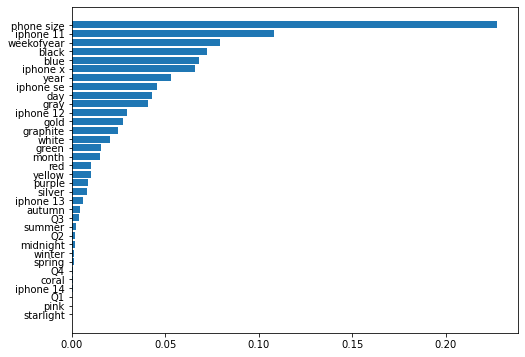

In [16]:
# feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(hspace=1)

ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Modeling based on important features

In [77]:
df_apple_2 = df_apple.copy()
df_apple_2 = df_apple_2[['phone size', 'claim','iphone 11','black','iphone x','blue','year','weekofyear',
                         'iphone se','day', 'gray','gold','iphone 12','white','month','iphone 14']]
display(df_apple_2)

,phone size,claim,iphone 11,black,iphone x,blue,year,weekofyear,iphone se,day,gray,gold,iphone 12,white,month,iphone 14
week_of_monday,,,,,,,,,,,,,,,,
2021-06-28,128,111,1,1,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,22,1,0,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,42,1,0,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,46,1,0,0,0,2021,26,0,28,0,0,0,0,6,0
2021-06-28,128,51,1,0,0,0,2021,26,0,28,0,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,512,11,0,0,1,0,2023,9,0,27,1,0,0,0,2,0
2023-02-27,512,2,0,0,1,0,2023,9,0,27,0,0,0,0,2,0
2023-02-27,64,45,0,0,1,0,2023,9,0,27,0,1,0,0,2,0


In [123]:
# data splitting
train = df_apple_2.iloc[df_apple_2.index < '2023-01-02']
test = df_apple_2.iloc[df_apple_2.index >= '2023-01-02']

FEATURES = df_apple_2.columns.to_list()
FEATURES.remove('claim')
TARGET = 'claim'

X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]


In [79]:
model2 = RandomForestRegressor(oob_score = True, n_jobs=1, random_state = 10, 
                              max_features = "auto", min_samples_leaf = 4)

model2.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=4, n_jobs=1, oob_score=True,
                      random_state=10)

In [59]:
pred2 = model2.predict(X_test)
r2_score(Y_test, pred2)

0.17334185757641585

# Model 1 graphing

In [17]:
import seaborn as sns

In [23]:
try:
    with open("final_test_set.csv", 'r') as tempfile: # OSError if file exists or is invalid
        pass
except OSError as e:
    print(e)
    # handle error here

In [40]:
#load the data and learn a bit
X_test = pd.read_csv("final_test_set.csv")
X_test = X_test.drop('claim', axis=1)
display(X_test.head())
X_test.info()

,phone size,year,black,blue,coral,gold,graphite,gray,green,midnight,...,Q4,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day
0,128,2023,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
1,128,2023,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
2,128,2023,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
3,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6
4,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,10,3,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   phone size  72 non-null     int64
 1   year        72 non-null     int64
 2   black       72 non-null     int64
 3   blue        72 non-null     int64
 4   coral       72 non-null     int64
 5   gold        72 non-null     int64
 6   graphite    72 non-null     int64
 7   gray        72 non-null     int64
 8   green       72 non-null     int64
 9   midnight    72 non-null     int64
 10  pink        72 non-null     int64
 11  purple      72 non-null     int64
 12  red         72 non-null     int64
 13  silver      72 non-null     int64
 14  starlight   72 non-null     int64
 15  white       72 non-null     int64
 16  yellow      72 non-null     int64
 17  autumn      72 non-null     int64
 18  spring      72 non-null     int64
 19  summer      72 non-null     int64
 20  winter      72 non-null     int64


In [25]:
graph_test_1 = X_test.copy()
graph_test_1['claim_prediction'] = model.predict(X_test)
graph_test_1

,phone size,year,black,blue,coral,gold,graphite,gray,green,midnight,...,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day,claim_prediction
0,128,2023,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,37.272476
1,128,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,96.929364
2,128,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,10,3,6,56.461893
3,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,11.754842
4,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,30.546008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,512,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,39.973839
68,512,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,13,3,27,7.383557
69,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,2.129872
70,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,4.776441


In [26]:
res_group_week = graph_test_1.groupby(['weekofyear']).agg({'claim_prediction': ['sum']})
res_group_size = graph_test_1.groupby(['weekofyear', 'phone size']).agg({'claim_prediction': ['sum']})
print(res_group_week)
print(res_group_size)

           claim_prediction
                        sum
weekofyear                 
10               507.244042
11               534.214830
12               542.258891
13               553.612516
                      claim_prediction
                                   sum
weekofyear phone size                 
10         128              250.208582
           256              194.662571
           512               62.372888
11         128              258.511365
           256              215.407634
           512               60.295831
12         128              259.732624
           256              216.985685
           512               65.540583
13         128              276.927739
           256              212.760225
           512               63.924552


In [28]:
# Graphing
graph_df = df_apple.copy()
#graph_df.info()
#graph_df.groupby(['']).mean()

graph_test = graph_df.loc[graph_df.index >= '2023-01-02']

graph_test['claim prediction'] = model.predict(X_test)

#graph_test = graph_test.loc[(graph_test['phone size'] == 256) & (graph_test['black'] == 1)]
graph_test = graph_test.loc[(graph_test['iphone 14'] == 1)]


display(graph_test)
#graph_test = graph_test.groupby(['weeks_monday', 'phone size']).agg({'claim': ['sum']})
graph_test = pd.DataFrame(graph_test.groupby(['week_of_monday'])["claim","claim prediction"].sum())



graph_test["week_of_monday"] = graph_test.index
graph_test = graph_test.reset_index(drop = True)
#graph_test = graph_test.iloc[:-1,:]
display(graph_test)
graph_test.info()

#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim'].plot(figsize = (15,5))


#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim'].plot(figsize = (15,5))

#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim prediction'].plot(figsize = (15,5))

# Create a figure and axis object

# Plot the time series data
#ax.plot((graph_test.loc[(graph_test['phone size'] == '64') & (graph_test['iphone 11'] == ), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == '64') & (graph_test['iphone 11'] == 1), 'claim']))

#ax.plot((graph_test.loc[(graph_test['phone size'] == 64), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == 64), 'claim']))
#ax.plot((graph_test.loc[(graph_test['phone size'] == '64gb') & (graph_test['model_group'] == 'iphone 11'), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == '64gb') & (graph_test['model_group'] == 'iphone 11'), 'claim prediction']))
#plt.scatter(graph_test['quarter'], graph_teste['claim prediction'])
#plt.scatter((graph_test.loc[graph_test['phone size'] == '64gb', 'claim prediction']), 
            #(graph_test.loc[graph_test['phone size'] == '64gb', 'month']))



<ipython-input-28-25bbc0629044>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_test['claim prediction'] = model.predict(X_test)


,phone size,claim,year,black,blue,coral,gold,graphite,gray,green,...,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day,claim prediction
week_of_monday,,,,,,,,,,,,,,,,,,,,,
2023-01-02,128,28,2023,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,38.760611
2023-01-02,128,5,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,32.195529
2023-01-02,256,7,2023,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,7.658798
2023-01-02,256,1,2023,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,108.181631
2023-01-02,256,2,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,1.958587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,128,99,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,9,2,27,14.660699
2023-02-27,256,33,2023,1,0,0,0,0,0,0,...,0,0,0,1,0,0,9,2,27,7.124135
2023-02-27,256,2,2023,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9,2,27,50.623521


<ipython-input-28-25bbc0629044>:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph_test = pd.DataFrame(graph_test.groupby(['week_of_monday'])["claim","claim prediction"].sum())


,claim,claim prediction,week_of_monday
0,45,190.823232,2023-01-02
1,59,178.732313,2023-01-09
2,60,81.763408,2023-01-16
3,57,73.664820,2023-01-23
4,54,175.614541,2023-01-30
5,243,218.281462,2023-02-06
6,330,198.322217,2023-02-13
7,350,165.703531,2023-02-20
8,467,315.297324,2023-02-27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   claim             9 non-null      int64         
 1   claim prediction  9 non-null      float64       
 2   week_of_monday    9 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 344.0 bytes


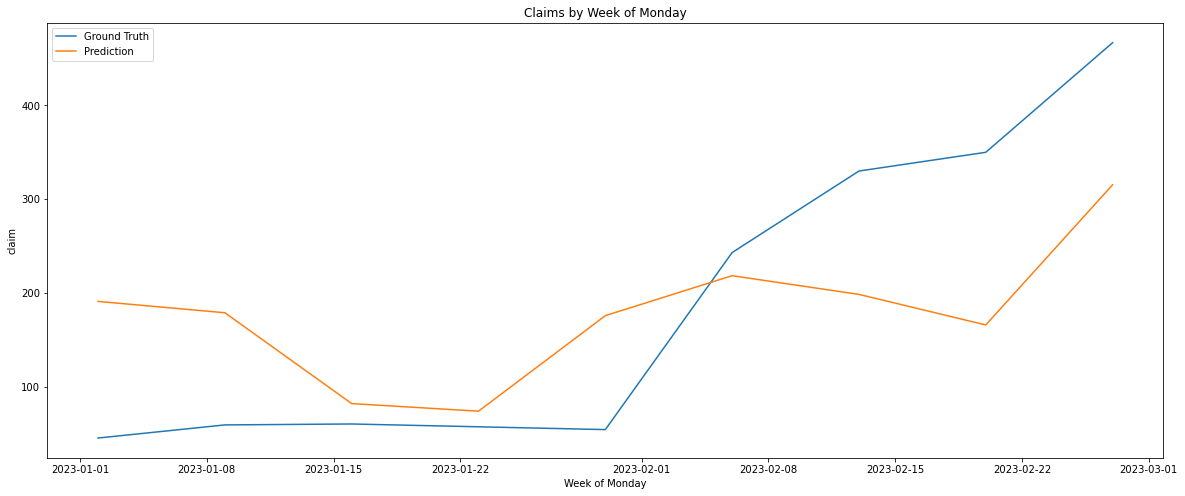

In [29]:
# function to write features for claim prediction
plt.figure(figsize = (20,8))
sns.lineplot(x = "week_of_monday", y = "claim", data = graph_test)
sns.lineplot(x = "week_of_monday", y = "claim prediction", data = graph_test)

plt.xlabel("Week of Monday")
plt.title('Claims by Week of Monday')
plt.legend(['Ground Truth', 'Prediction'], loc='upper left')


In [30]:
# WMAP score
def calc_wmape(actual, pred):
    abs_diff = abs(actual - pred)
    weight = (abs_diff / actual * 100) * actual
    total_weight = weight.sum()
    total_claims = actual.sum()
    return (total_weight/total_claims)

calc_wmape(graph_test['claim'], graph_test['claim prediction'])

55.13476149642817

# Model 2 graphing

In [80]:
# Graphing
graph_df_2 = df_apple_2.copy()
#graph_df.info()
#graph_df.groupby(['']).mean()

graph_test_2 = graph_df_2.loc[graph_df_2.index >= '2023-01-02']
graph_test_2['claim prediction'] = model2.predict(X_test)

#graph_test = graph_test.loc[(graph_test['phone size'] == 128) & (graph_test['black'] == 1)]
#graph_test_2 = graph_test_2.loc[(graph_test_2['iphone 14'] == 1)]

display(graph_test_2)
#graph_test = graph_test.groupby(['weeks_monday', 'phone size']).agg({'claim': ['sum']})
graph_test_2 = pd.DataFrame(graph_test_2.groupby(['week_of_monday'])["claim","claim prediction"].sum())
graph_test_2["week_of_monday"] = graph_test_2.index
graph_test_2 = graph_test_2.reset_index(drop = True)
#graph_test = graph_test.iloc[:-1,:]
display(graph_test_2)
graph_test_2.info()

<ipython-input-80-57d026a6194b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_test_2['claim prediction'] = model2.predict(X_test)


,phone size,claim,iphone 11,black,iphone x,blue,year,weekofyear,iphone se,day,gray,gold,iphone 12,white,month,iphone 14,claim prediction
week_of_monday,,,,,,,,,,,,,,,,,
2023-01-02,128,233,1,1,0,0,2023,1,0,2,0,0,0,0,1,0,239.807823
2023-01-02,128,33,1,0,0,0,2023,1,0,2,0,0,0,0,1,0,59.017696
2023-01-02,128,58,1,0,0,0,2023,1,0,2,0,0,0,0,1,0,59.017696
2023-01-02,128,48,1,0,0,0,2023,1,0,2,0,0,0,0,1,0,59.017696
2023-01-02,128,96,1,0,0,0,2023,1,0,2,0,0,0,1,1,0,92.774014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,512,11,0,0,1,0,2023,9,0,27,1,0,0,0,2,0,8.724679
2023-02-27,512,2,0,0,1,0,2023,9,0,27,0,0,0,0,2,0,5.161771
2023-02-27,64,45,0,0,1,0,2023,9,0,27,0,1,0,0,2,0,62.980770


<ipython-input-80-57d026a6194b>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph_test_2 = pd.DataFrame(graph_test_2.groupby(['week_of_monday'])["claim","claim prediction"].sum())


,claim,claim prediction,week_of_monday
0,10908,9115.106824,2023-01-02
1,10608,8622.680840,2023-01-09
2,11189,8220.505686,2023-01-16
3,11131,8170.499762,2023-01-23
4,9981,8399.563964,2023-01-30
5,12049,8164.289481,2023-02-06
6,11696,8137.920403,2023-02-13
7,12112,8067.929956,2023-02-20
8,11999,8701.194376,2023-02-27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   claim             9 non-null      int64         
 1   claim prediction  9 non-null      float64       
 2   week_of_monday    9 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 344.0 bytes


Text(0.5, 0, '')

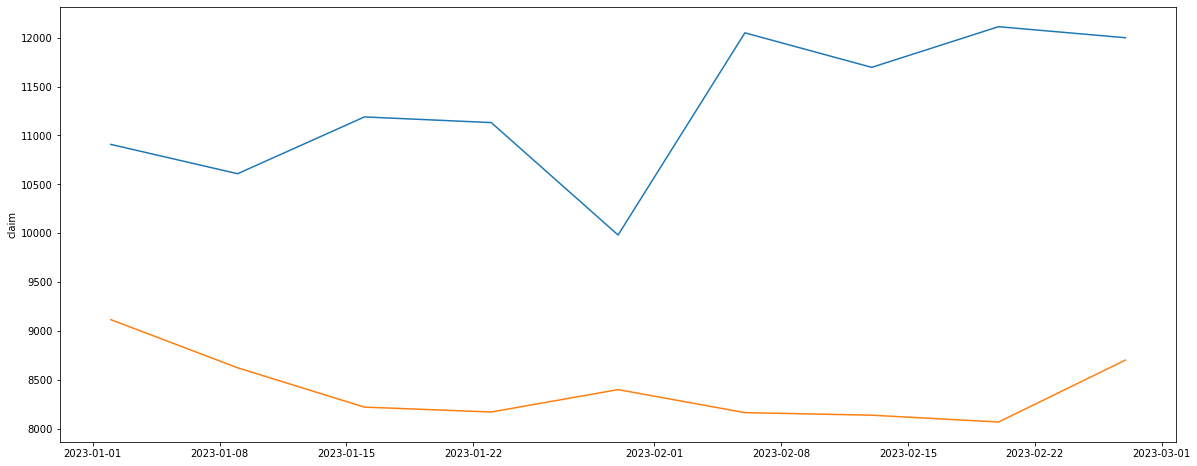

In [81]:
plt.figure(figsize = (20,8))
sns.lineplot(x = "week_of_monday", y = "claim", data = graph_test_2)
sns.lineplot(x = "week_of_monday", y = "claim prediction", data = graph_test_2)

plt.xlabel("")

In [82]:
# WMAP score
def calc_wmape(actual, pred):
    abs_diff = abs(actual - pred)
    weight = (abs_diff / actual * 100) * actual
    total_weight = weight.sum()
    total_claims = actual.sum()
    return (total_weight/total_claims)

calc_wmape(graph_test_2['claim'], graph_test_2['claim prediction'])

25.644279906656976


# Hyperparameter tuning

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [32]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,30, 50, 80, 90, 100, 110],
    'max_features': ['sqrt','log'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

random_search = RandomizedSearchCV(
    model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2
)

In [33]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=True, max_depth=80, max_features=log, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80,

/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=80, max_features=log, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=log, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=log, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   4.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   4.9s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.3s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=90, max_features=log, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=log, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.1s


/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/joblib/parallel.py"

[CV] END bootstrap=True, max_depth=50, max_features=log, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=log, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_f

/accre/arch/easybuild/software/BinDist/Anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.45929459        nan        nan        nan        nan
 0.45181778        nan        nan 0.37839298]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(min_samples_leaf=4, n_jobs=1,
                                                   oob_score=True,
                                                   random_state=10),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 30, 50, 80, 90, 100,
                                                      110],
                                        'max_features': ['sqrt', 'log'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   verbose=2)

In [34]:
print(random_search.best_params_)

{'n_estimators': 1000, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [35]:
final_model = RandomForestRegressor(**random_search.best_params_)
final_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=12, n_estimators=1000)

In [36]:
pred_2 = final_model.predict(X_test)
r2_score(Y_test, pred_2)
print(f'model score on training data: {final_model.score(X_train, Y_train)}')
print(f'model score on testing data: {final_model.score(X_test, Y_test)}')

model score on training data: 0.6220293043163989
model score on testing data: 0.21696498058549518


In [41]:
graph_test_2 = X_test.copy()
graph_test_2['claim_prediction'] = final_model.predict(X_test)
graph_test_2

,phone size,year,black,blue,coral,gold,graphite,gray,green,midnight,...,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day,claim_prediction
0,128,2023,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,75.420181
1,128,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,75.503610
2,128,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,10,3,6,47.494582
3,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,31.847188
4,128,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,10,3,6,24.723661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,512,2023,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,51.881645
68,512,2023,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,13,3,27,18.845881
69,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,17.134079
70,512,2023,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,13,3,27,11.621491


In [43]:
res_group_week = graph_test_2.groupby(['weekofyear']).agg({'claim_prediction': ['sum']})
res_group_size = graph_test_2.groupby(['weekofyear', 'phone size']).agg({'claim_prediction': ['sum']})
print(res_group_week)
print(res_group_size)

           claim_prediction
                        sum
weekofyear                 
10               661.563535
11               669.355619
12               709.004884
13               716.450645
                      claim_prediction
                                   sum
weekofyear phone size                 
10         128              284.795860
           256              239.109628
           512              137.658047
11         128              288.065363
           256              242.674123
           512              138.616133
12         128              296.300782
           256              258.423660
           512              154.280442
13         128              299.644784
           256              260.307384
           512              156.498478


In [55]:
# Graphing
graph_df_2 = df_apple.copy()
#graph_df.info()
#graph_df.groupby(['']).mean()

graph_test_2 = graph_df_2.loc[graph_df_2.index >= '2023-01-02']

graph_test_2['claim prediction'] = final_model.predict(X_test)

#graph_test = graph_test.loc[(graph_test['phone size'] == 256) & (graph_test['black'] == 1)]
graph_test_2 = graph_test_2.loc[(graph_test_2['iphone 14'] == 1)]


display(graph_test_2)
#graph_test = graph_test.groupby(['weeks_monday', 'phone size']).agg({'claim': ['sum']})
graph_test_2 = pd.DataFrame(graph_test_2.groupby(['week_of_monday'])["claim","claim prediction"].sum())



graph_test_2["week_of_monday"] = graph_test_2.index
graph_test_2 = graph_test_2.reset_index(drop = True)
#graph_test = graph_test.iloc[:-1,:]
display(graph_test_2)
graph_test_2.info()

#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim'].plot(figsize = (15,5))


#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim'].plot(figsize = (15,5))

#graph_test.loc[(graph_test['black']==1) & (graph_test['phone size']==64), 'claim prediction'].plot(figsize = (15,5))

# Create a figure and axis object

# Plot the time series data
#ax.plot((graph_test.loc[(graph_test['phone size'] == '64') & (graph_test['iphone 11'] == ), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == '64') & (graph_test['iphone 11'] == 1), 'claim']))

#ax.plot((graph_test.loc[(graph_test['phone size'] == 64), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == 64), 'claim']))
#ax.plot((graph_test.loc[(graph_test['phone size'] == '64gb') & (graph_test['model_group'] == 'iphone 11'), 'weeks_monday']), 
#        (graph_test.loc[(graph_test['phone size'] == '64gb') & (graph_test['model_group'] == 'iphone 11'), 'claim prediction']))
#plt.scatter(graph_test['quarter'], graph_teste['claim prediction'])
#plt.scatter((graph_test.loc[graph_test['phone size'] == '64gb', 'claim prediction']), 
            #(graph_test.loc[graph_test['phone size'] == '64gb', 'month']))



<ipython-input-55-0968b97ed9f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_test_2['claim prediction'] = final_model.predict(X_test)


,phone size,claim,year,black,blue,coral,gold,graphite,gray,green,...,iphone 11,iphone 12,iphone 13,iphone 14,iphone se,iphone x,weekofyear,month,day,claim prediction
week_of_monday,,,,,,,,,,,,,,,,,,,,,
2023-01-02,128,28,2023,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,85.753999
2023-01-02,128,5,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,38.247671
2023-01-02,256,7,2023,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,55.868534
2023-01-02,256,1,2023,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,72.338431
2023-01-02,256,2,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,29.851889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,128,99,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,9,2,27,32.260290
2023-02-27,256,33,2023,1,0,0,0,0,0,0,...,0,0,0,1,0,0,9,2,27,52.480910
2023-02-27,256,2,2023,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9,2,27,46.589786


<ipython-input-55-0968b97ed9f7>:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph_test_2 = pd.DataFrame(graph_test_2.groupby(['week_of_monday'])["claim","claim prediction"].sum())


,claim,claim prediction,week_of_monday
0,45,310.160111,2023-01-02
1,59,293.183908,2023-01-09
2,60,231.990444,2023-01-16
3,57,188.492748,2023-01-23
4,54,262.993389,2023-01-30
5,243,421.675212,2023-02-06
6,330,361.964504,2023-02-13
7,350,333.815384,2023-02-20
8,467,573.120658,2023-02-27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   claim             9 non-null      int64         
 1   claim prediction  9 non-null      float64       
 2   week_of_monday    9 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 344.0 bytes


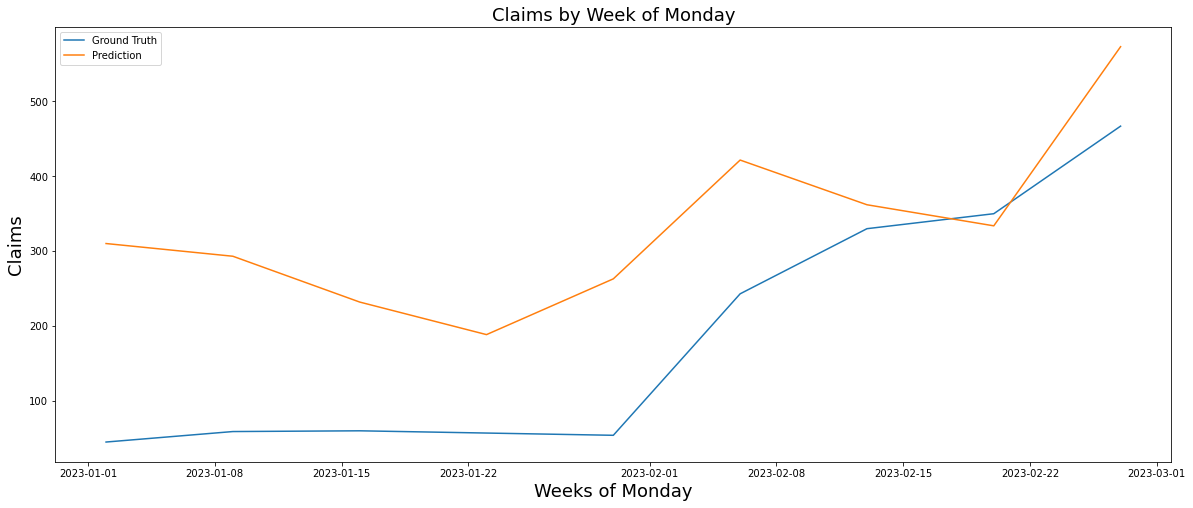

In [61]:
# function to write features for claim prediction
plt.figure(figsize = (20,8))
sns.lineplot(x = "week_of_monday", y = "claim", data = graph_test)
sns.lineplot(x = "week_of_monday", y = "claim prediction", data = graph_test)

plt.xlabel("Weeks of Monday", fontsize=18)
plt.ylabel("Claims", fontsize=18)
plt.title('Claims by Week of Monday', fontsize=18)
plt.legend(['Ground Truth', 'Prediction'], loc='upper left')

In [57]:
# WMAP score on test data
def calc_wmape(actual, pred):
    abs_diff = abs(actual - pred)
    weight = (abs_diff / actual * 100) * actual
    total_weight = weight.sum()
    total_claims = actual.sum()
    return (total_weight/total_claims)

calc_wmape(graph_test_2['claim'], graph_test_2['claim prediction'])

80.76670209512254